In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

15216

In [4]:
test_Features[:2]

array([[-0.54514198, -0.21932626, -0.27786879,  0.52170994,  0.70441   ,
         0.26736555,  0.31590081,  0.44145686, -0.37814548, -1.09130497],
       [-0.61831305, -0.4743251 , -0.44228323,  0.54194972,  0.65373489,
        -0.05585309, -0.60054665, -0.48406292, -0.49012523, -0.29612042]])

In [5]:
train_Label[:4]

array([1, 1, 0, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 1, 1, 0])

In [8]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [9]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

Using TensorFlow backend.


In [11]:
model = Sequential()

In [12]:
model.add(SimpleRNN(units=10, input_shape=(10,1)))

In [13]:
model.add(Dense(1, activation = "sigmoid"))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [16]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=300,verbose=2)

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 1s - loss: 0.6335 - acc: 0.6339 - val_loss: 0.5832 - val_acc: 0.7096
Epoch 2/30
 - 0s - loss: 0.5495 - acc: 0.7266 - val_loss: 0.5355 - val_acc: 0.7569
Epoch 3/30
 - 0s - loss: 0.5196 - acc: 0.7559 - val_loss: 0.5153 - val_acc: 0.7628
Epoch 4/30
 - 0s - loss: 0.5056 - acc: 0.7652 - val_loss: 0.5050 - val_acc: 0.7661
Epoch 5/30
 - 0s - loss: 0.4970 - acc: 0.7695 - val_loss: 0.4965 - val_acc: 0.7707
Epoch 6/30
 - 0s - loss: 0.4878 - acc: 0.7730 - val_loss: 0.4869 - val_acc: 0.7707
Epoch 7/30
 - 0s - loss: 0.4767 - acc: 0.7765 - val_loss: 0.4722 - val_acc: 0.7865
Epoch 8/30
 - 0s - loss: 0.4640 - acc: 0.7844 - val_loss: 0.4596 - val_acc: 0.7884
Epoch 9/30
 - 0s - loss: 0.4527 - acc: 0.7895 - val_loss: 0.4475 - val_acc: 0.7957
Epoch 10/30
 - 0s - loss: 0.4422 - acc: 0.7979 - val_loss: 0.4374 - val_acc: 0.7970
Epoch 11/30
 - 0s - loss: 0.4330 - acc: 0.8025 - val_loss: 0.4270 - val_acc: 0.8003
Epoch 12/30
 - 0s - loss: 0.4260 - a

In [17]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

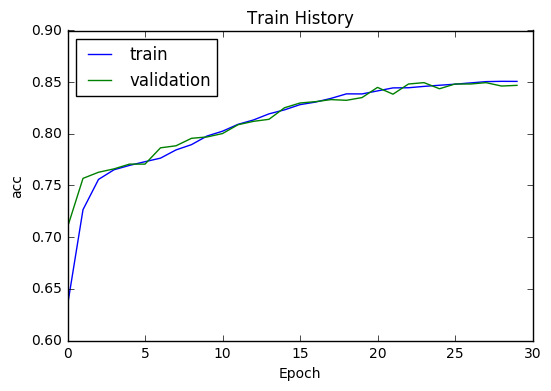

In [18]:
show_train_history(train_history,'acc','val_acc')

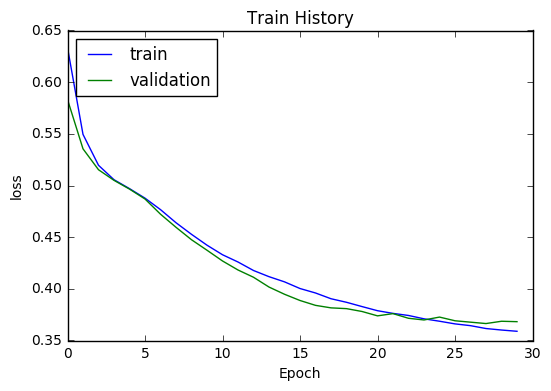

In [19]:
show_train_history(train_history,'loss','val_loss')

In [20]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 36us/step


In [21]:
scores[1]

0.8504206098843323